<a href="https://colab.research.google.com/github/mathiasadikpon/AI/blob/main/Week13_Homework_FashionMNIST_Mathias_Adikpon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework: FashionMNIST

For this homework assignment, you are asked to build a neural network classifier on the FasionMNIST dataset. The FashionMNIST dataset has a lot in common with the MNIST dataset:
- The dataset contains 70,000 grayscale images, split into training set (60,000 images) and test set (10,000 images).
- The resolution of images is 28 by 28 pixels.
- There are a total of 10 target labels.

<img src="https://tensorflow.org/images/fashion-mnist-sprite.png" width="600">

In [ ]:
import numpy as np
import tensorflow as tf
print("Version: ", tf.__version__)

Version:  2.4.1


In [ ]:
# Import the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# Here are the list of class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Please complete the following tasks:
1. Scale the values to [0, 1] by dividing every value by 255.0.
2. Use `plt.imshow()` to display the first image from the training set.
3. Build a neural network with three layers:
    - The first layer is a flatten layer of size 28 * 28.
    - The second layer is a dense layer with 128 nodes, with ReLU as activation function.
    - The last layer is a dense layer with 10 nodes without activation.
4. Compile the model, using `adam` as optimizer and `tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)` as loss function. Use `accuracy` as performance metrics.
5. Train the model using `train_images` and `train_labels` for 10 epochs.
6. Evaluate the accuracy on the test set.
7. Compute the confusion matrix over test set. Which type of prediction mistake occurs most frequently?

In [ ]:
# 1. Scale the values to [0, 1] by dividing every value by 255.0.
# Convert the data from integers to floating-point numbers
train_images, test_images = train_images/255.0, test_images/255.0

print(train_images.shape, test_images.shape)

(60000, 28, 28) (10000, 28, 28)


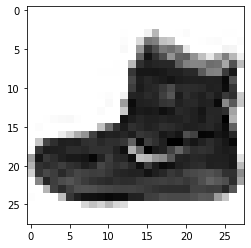

In [ ]:
# 2. Use plt.imshow() to display the first image from the training set.
import matplotlib.pyplot as plt
idx = 0
img = train_images[idx, :, :] # : means that we include all indices
plt.imshow(img, cmap=plt.cm.binary)

In [ ]:
# 3. Build a neural network with three layers:

# The first layer is a flatten layer of size 28 * 28.
# The second layer is a dense layer with 128 nodes, with ReLU as activation function.
# The last layer is a dense layer with 10 nodes without activation.

import tensorflow.keras as K # A common abbrevation of the kera package.
# Build a neural network model by stacking layers.

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # convert a 28*28 matrix into a 784 1D array
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)                                   
])


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. Compile the model, using adam as optimizer and 
# tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) as loss 
#function. Use accuracy as performance metrics.
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
# loss_fn(train_images[index:(index+1)], predictions).numpy()

model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


In [ ]:
# 5. Train the model using train_images and train_labels for 10 epochs.

# The Model.fit method adjusts the model parameters to minimize the loss
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6342 - accuracy: 0.7767
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3861 - accuracy: 0.8627
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8754
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3170 - accuracy: 0.8811
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2927 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2791 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2734 - accuracy: 0.8977
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2585 - accuracy: 0.9022
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2496 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.236

In [ ]:
# 6. Evaluate the accuracy on the test set.

l_accur = model.evaluate(test_images, test_labels)


313/313 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.8788


In [ ]:
accuracy = l_accur[1]
print("Accuracy score on the test set is :", round(accuracy,3))

Accuracy score on the test set is : 0.879


In [ ]:
# 7. Compute the confusion matrix over test set.

# Show the confusion matrix
from sklearn.metrics import confusion_matrix

y_test_pred = []
raw_predictions = model(test_images).numpy()
for row_idx in range(raw_predictions.shape[0]):
    logits = raw_predictions[row_idx, :]
    probs = tf.nn.softmax(logits).numpy()
    class_pred = np.argmax(probs)
    y_test_pred.append(class_pred)
print(y_test_pred)

[9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 7, 3, 4, 1, 2, 2, 8, 0, 2, 5, 7, 5, 1, 2, 6, 6, 9, 4, 8, 8, 3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 6, 7, 6, 7, 2, 1, 2, 6, 4, 2, 5, 8, 2, 2, 8, 6, 8, 0, 7, 7, 8, 5, 1, 1, 6, 4, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2, 0, 2, 5, 1, 6, 7, 1, 8, 0, 1, 2, 2, 3, 6, 7, 2, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8, 0, 0, 9, 9, 3, 0, 8, 2, 1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4, 1, 3, 5, 0, 4, 7, 9, 3, 7, 2, 3, 5, 0, 9, 4, 7, 4, 2, 6, 5, 6, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6, 7, 9, 9, 4, 4, 7, 1, 2, 3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 6, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3, 1, 6, 7, 2, 8, 5, 3, 0, 7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 2, 4, 6, 4, 2, 4, 9, 7, 6, 5, 5, 4, 8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 4, 8, 7, 6, 1, 6, 0, 2, 3, 0, 8, 3, 7, 4, 0, 1, 6, 4, 0, 6, 0, 7, 5, 4, 5, 9, 5, 6, 5, 5, 1, 9, 8, 8, 3, 3, 6, 8, 0, 0, 2, 9, 7, 7, 1, 3, 6, 4, 2, 4, 7, 1, 6, 4, 8, 2, 6, 5, 6, 2, 7, 7, 7, 3, 3, 7, 6, 

In [ ]:
mat = confusion_matrix(test_labels, y_test_pred)
print("Confusion Matrix is :\n", mat)

Confusion Matrix is :
 [[823   1  23  13   6   2 130   0   2   0]
 [  4 972   2  16   3   1   1   0   1   0]
 [ 14   2 822   5  93   0  64   0   0   0]
 [ 27   8  15 858  51   0  40   0   1   0]
 [  1   1 102  15 799   0  82   0   0   0]
 [  0   0   0   0   0 969   0  22   0   9]
 [103   1 106  19  55   0 712   0   4   0]
 [  0   0   0   0   0  13   0 979   0   8]
 [  7   0   4   2  15   6   8   6 952   0]
 [  0   0   0   0   0   9   1  88   0 902]]


Which type of prediction mistake occurs most frequently?

In [ ]:
# Which type of prediction mistake occurs most frequently?
# On the diagonal of the confusion matrix, the largest value is 979 which is at column index 7 count from 0
# At index 7, we have T-shirt as show in the image that I display in the battom. Thus, I conclut that T-shirt are being 
# mistaken and it is the most common prediction error. 

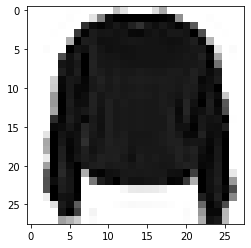

In [ ]:
idx = 7
img1 = train_images[idx, :, :] # : means that we include all indices
plt.imshow(img1, cmap=plt.cm.binary)